<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/06.%20Week%206/clusteringcampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist, pdist

In [16]:
# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringcampaign.csv"
df = pd.read_csv(url)

# Cek data dan bersihkan jika perlu
df.dropna(inplace=True)


In [17]:
# Lihat kolom-kolom
print(df.columns)

# Ubah semua kolom numerik yang berbentuk string menjadi float
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)  # hapus selain angka dan titik
    try:
        df[col] = df[col].astype(float)
    except:
        pass  # biarkan kolom tetap object jika tidak bisa dikonversi

# Seleksi kembali kolom numerik
X = df.select_dtypes(include='number')

# Pastikan tidak kosong
print(X.head())

# Standarisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Index(['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'], dtype='object')
   ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0                                       5.524196e+55                                                                                                                                            

In [18]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include='number'))

In [19]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Agglomerative
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)

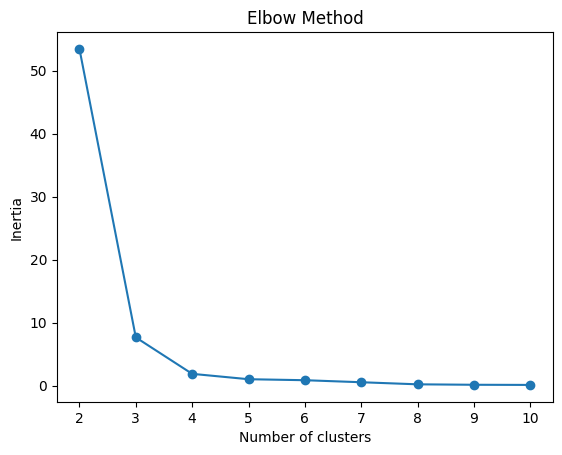

KMeans Evaluation: {'Silhouette Score': np.float64(0.9968126819863591), 'Calinski-Harabasz Index': np.float64(326715.6062387956), 'Davies-Bouldin Index': np.float64(0.06054038716662127)}
Agglomerative Evaluation: {'Silhouette Score': np.float64(0.9968126819863591), 'Calinski-Harabasz Index': np.float64(326715.6062387956), 'Davies-Bouldin Index': np.float64(0.06054038716662127)}


In [20]:
# Elbow Method
inertias = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Evaluasi metrik
def evaluate_clustering(X, labels):
    return {
        "Silhouette Score": silhouette_score(X, labels),
        "Calinski-Harabasz Index": calinski_harabasz_score(X, labels),
        "Davies-Bouldin Index": davies_bouldin_score(X, labels)
    }

print("KMeans Evaluation:", evaluate_clustering(X_scaled, kmeans_labels))
print("Agglomerative Evaluation:", evaluate_clustering(X_scaled, agg_labels))

In [22]:
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    intra_dists = []
    for k in unique_clusters:
        cluster_points = X[labels == k]
        if len(cluster_points) > 1:
            intra = np.max(pdist(cluster_points))
            intra_dists.append(intra)
    if len(intra_dists) == 0:
        raise ValueError("Tidak ada cluster dengan cukup data untuk menghitung intra-cluster distance")

    inter_dists = []
    for i in unique_clusters:
        for j in unique_clusters:
            if i < j:
                dist = np.min(cdist(X[labels == i], X[labels == j]))
                inter_dists.append(dist)
    return np.min(inter_dists) / np.max(intra_dists)

print("Dunn Index KMeans:", dunn_index(X_scaled, kmeans_labels))
print("Dunn Index Agglomerative:", dunn_index(X_scaled, agg_labels))

Dunn Index KMeans: 2.0473191451436055
Dunn Index Agglomerative: 2.0473191451436055


### KMeans:

- Silhouette Score: 0.9968
- Calinski-Harabasz Index: 326715.6062
- Davies-Bouldin Index: 0.0605
- Dunn Index: 2.0473

### Agglomerative:

- Silhouette Score: 0.9968
- Calinski-Harabasz Index: 326715.6062
- Davies-Bouldin Index: 0.0605
- Dunn Index: 2.0473

### Matriks Terbaik:
- kedua matriks tersebut memberikan data yang mirip, maka keduanya dapat dibilang sebagai matriks terbaik.




## 1.  **Silhouette Score**

### **Rumus:**

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

* $a(i)$: rata-rata jarak antar titik $i$ ke **titik lain dalam klusternya sendiri** (kompaksi).
* $b(i)$: rata-rata jarak antar titik $i$ ke **titik dalam kluster terdekat lain** (pemisahan).
* $s(i) \in [-1, 1]$

### **Interpretasi:**

* $s(i)$ mendekati **1** → titik sangat cocok dengan klusternya.
* $s(i)$ mendekati **0** → titik berada di batas dua kluster.
* $s(i)$ negatif → titik mungkin salah kluster.

---

## 2.  **Calinski-Harabasz Index (CH Index)**

### **Rumus:**

$$
CH = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n - k}{k - 1}
$$

* $\text{Tr}(B_k)$: jumlah variansi **antar cluster** (between-cluster dispersion)
* $\text{Tr}(W_k)$: jumlah variansi **dalam cluster** (within-cluster dispersion)
* $n$: jumlah total data
* $k$: jumlah cluster

### **Interpretasi:**

* Semakin **besar CH**, semakin **baik clustering** (cluster jauh satu sama lain dan padat di dalam).

---

## 3.  **Davies-Bouldin Index**

### **Rumus:**

$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{S_i + S_j}{M_{ij}} \right)
$$

* $S_i$: rata-rata jarak tiap titik ke centroid kluster $i$
* $M_{ij}$: jarak antara centroid kluster $i$ dan $j$

### **Interpretasi:**

* Semakin **rendah nilai DB**, semakin **baik** (cluster kompak dan jauh dari satu sama lain).

---

## 4.  **Dunn Index**

### **Rumus:**

$$
D = \frac{\min_{1 \leq i < j \leq k} d(c_i, c_j)}{\max_{1 \leq l \leq k} \delta_l}
$$

* $d(c_i, c_j)$: jarak minimum antar dua **cluster berbeda**
* $\delta_l$: diameter (maksimal jarak antar titik dalam) cluster $l$

### **Interpretasi:**

* Semakin **tinggi** Dunn Index, semakin **baik** clustering.
* Mengukur **rasio pemisahan antar cluster** dibanding **penyebaran internal cluster**.